In [4]:
import os
import numpy as np
# from torch.utils.data import DataLoader, Dataset

from preprocess import resize_input, train_test_split
from triplet_dataset import PairDataset

import cv2
import torch


In [5]:
import importlib
from triplet_dataset import PairDataset
import triplet_dataset

importlib.reload(triplet_dataset)
from triplet_dataset import PairDataset

In [6]:
# LIMIT = 80_000

In [7]:
# train_dataset = torch.load("data/train_dataset_shuffled.pt")
# len(train_dataset)

In [8]:
# train_dataset = TripletDataset(train_dataset.data, train_dataset.labels)
# torch.save(train_dataset, "data/train_dataset.pt")

In [9]:
# Test
# (Xa, Xp, Xn), (ya, yp, yn) = eval_ds[0]


In [10]:
# Xa.shape, ya, Xp.shape, yp, Xn.shape, yn

In [11]:
# torch.save(eval_ds, "data/eval_dataset.pt")

In [12]:
# train_ds = TripletDataset(train_ds.data[:LIMIT], train_ds.labels[:LIMIT])

In [13]:
# torch.save(train_ds, "data/train_dataset_100k.pt")

In [14]:
# len(eval_ds), len(train_ds)

In [15]:
# from torch.utils.data import DataLoader

# dl = DataLoader(train_ds, 128, shuffle=True)

# for i, batch in enumerate(dl):
#     if i % 100 == 0:
#         print(i)

In [16]:
# torch.save(train_ds, "data/train_dataset.pt")
# torch.save(eval_ds, "data/eval_dataset.pt")


In [17]:
# classes = np.array([i for i in range(1, 1311)])
# tests = [i for i in range(1, 1311) if i not in train_subjects]
train_subjects = np.loadtxt("../train_subjects_mask.txt")

In [20]:
from PIL import Image
data_path = "../../UERC"

In [21]:
ear_data = os.listdir(data_path)

ear_imgs = {}
for person in ear_data:
    if int(person) not in train_subjects:
        continue
    
    imgs = os.listdir("%s/%s" % (data_path, person))
    try:
        ear_imgs[person] = [
            cv2.cvtColor(
                np.asarray(Image.open(f"{data_path}/{person}/{img}")), cv2.COLOR_BGR2RGB
            )
            for img in imgs
        ]
    except Exception as e:
        print(e)

In [22]:
# baseline_train = "../baseline/data/train_dataset.pt"
# baseline_eval = "../baseline/data/eval_dataset.pt"

In [84]:
X_train, X_eval, y_train, y_eval = train_test_split(ear_imgs)

In [85]:
# Get train set size
len(X_train) + len(X_eval)

173079

In [86]:
len(X_train)

120809

In [87]:
X_train = resize_input(X_train, 64, mode="train")
X_eval = resize_input(X_eval, 64, mode="test")

In [113]:
import importlib
from triplet_dataset import PairDataset
import triplet_dataset

importlib.reload(triplet_dataset)
from triplet_dataset import PairDataset


In [114]:
train_dataset = PairDataset(X_train, y_train)

In [115]:
(Xa, Xb), (ya, yb) = train_dataset[1000]

In [116]:
for (_, _), (a, b) in train_dataset:
    if a != b:
        print(a, b)

0 614
0 1074
0 1192
1 685
3 917
3 1146
3 749
3 895
4 680
4 895
5 150
5 990
5 918
5 1085
5 947
6 850
6 1124
6 1173
6 687
6 1116
6 716
7 1046
7 976
8 887
10 827
10 998
10 970
10 1107
10 1049
12 961
13 742
14 596
14 1013
14 767
14 904
15 830
15 1173
15 717
15 850
15 652
15 1273
16 1081
16 669
16 1240
16 784
18 262
18 872
18 683
18 1167
18 822
19 861
19 803
19 1063
21 727
21 787
21 1102
22 946
22 1057
23 871
23 776
23 675
24 798
24 1303
24 950
24 917
25 1041
25 741
25 915
29 995
29 1086
30 833
30 656
30 945
30 650
31 667
31 251
31 1030
31 1162
31 926
32 1083
32 1088
32 1285
32 775
33 760
33 1309
33 364
33 958
33 172
34 864
34 1307
34 714
34 862
34 917
34 1030
34 1251
36 976
36 669
36 839
36 709
37 1068
37 804
37 1189
39 748
39 787
39 909
39 475
41 761
41 682
42 1120
42 833
42 678
43 824
43 717
43 742
43 1142
44 1023
44 958
44 705
45 1203
45 895
45 977
47 962
47 861
48 1023
48 1159
48 726
49 866
49 708
49 784
49 976
49 766
49 718
51 940
51 1220
51 769
51 807
51 816
52 349
52 786
52 900
52 8

In [117]:
Xa.shape, Xb.shape, ya, yb

(torch.Size([3, 64, 64]), torch.Size([3, 64, 64]), 163, 965)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


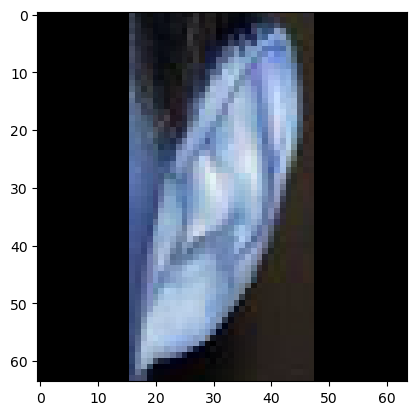

In [118]:
import matplotlib.pyplot as plt
plt.imshow(Xa.permute(1,2,0))

In [119]:
torch.save(train_dataset, "data/train_dataset.pt")

In [120]:
# X_eval = resize_input(X_eval, 64, mode="test")

eval_dataset = PairDataset(X_eval, y_eval)

In [121]:
from torch.utils.data import DataLoader

dl = DataLoader(eval_dataset, 1, shuffle=True)

In [122]:
sample = next(iter(dl))

In [123]:
data, label = sample

Xa, Xb = data
ya, yb = label

Xa.shape

torch.Size([1, 3, 64, 64])

In [124]:
torch.save(eval_dataset, "data/eval_dataset.pt")
